<a href="https://colab.research.google.com/github/leynessa/python_projects/blob/master/tree_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**NYC TREE CENSUS**







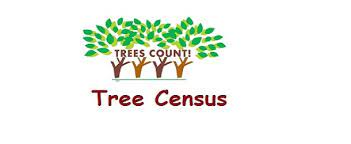

##Problem Statement

---

The goal of the project is to explore the data in the tree census dataset. The project will id the most common tree species and use geopandas to plot theur geolocation on a map od NYC



Dataset

---

This data set is from the NYC OpenData. IT contains data about trees on the street collected in 2015 Street Tree Census, which was conducted by volunteers and staff organized by NYC Parks & Recreation and partner organizations. Tree data collected includes tree species, diameter and perception of health. Accompanying blockface data is available indicating status of data collection and data release citywide. The dataset can be found at: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

Questions

---

How many different species of trees are there on the streets in NYC in 2016
How many healthy trees?
how many stumps or dead trees?
Where are the trees located ?

Import the relevant libraries and the files

---



In [ ]:
pip install geopandas

In [14]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")


Viewing snipets of data

---



In [ ]:
df.head()

View the columns and choosing the relevant columns

In [ ]:
df.columns

In [17]:
tree_census_subset = df[['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough']]

Data **Dictionary**

---
Unique Tree ID Number- tree_id <br>
Date trees were mapped - created_at <br>
Diameter at breast height of tree -tree_dbh <br>
Diameter of stump -stump_diam <br>
Tree Status -status <br>
Tree Health- health <br>
more: file:///C:/Users/leyne/Downloads/StreetTreeCensus2015TreesDataDictionary20161102.pdf


In [ ]:
tree_census_subset.columns

In [ ]:
tree_census_subset.tail()

Reviewing missing values

In [ ]:
tree_census_subset.isna().sum()

In [ ]:
#show where health is a nul value
tree_census_subset[tree_census_subset['health'].isna()]

 #dataframe.notna() function detects existing/ non-missing values in the dataframe.

In [ ]:
tree_census_subset.describe() #show the numerical values

In [ ]:
tree_census_subset.info()

In [ ]:
import missingno
missingno.bar(tree_census_subset)
missingno.matrix(tree_census_subset)



In [ ]:
tree_census_subset.hist(bins=80, figsize= (20,10))

In [ ]:
#query information about possivel outliers
big_tree = tree_census_subset[tree_census_subset['tree_dbh']>50]
big_tree.tail()

In [ ]:
big_tree.hist(bins=60, figsize=(20,10))

In [ ]:
big_tree[['tree_id', 'tree_dbh']].plot(kind = 'scatter', y =  'tree_dbh', x = 'tree_id', figsize=(20,10))

In [33]:
counting=tree_census_subset[[ 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address']]

In [ ]:
counting.apply(pd.Series.value_counts)

In [35]:
tree_census_subset['health'].value_counts()

Good    37612
Fair     9369
Poor     2807
Name: health, dtype: int64

**DATA CLEANING**

In [37]:
mask =( (tree_census_subset['status'] == 'Stump') | ( tree_census_subset['status'] == 'Dead') )

In [38]:
tree_census_subset.loc[mask, 'health'] = tree_census_subset.loc[mask, 'health'].fillna('Not Applicable')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [39]:
tree_census_subset[tree_census_subset['status'] == 'Stump']

tree_id  block_id  created_at  tree_dbh  stump_diam        curb_loc  \
37      211205    302080  09/09/2015         0          16          OnCurb   
239     203597    301947  09/04/2015         0          15          OnCurb   
641     179766    230466  08/27/2015         0          30          OnCurb   
644     180619    348834  08/27/2015         0          10          OnCurb   
646     208828    107238  09/08/2015         0          15          OnCurb   
648     181973    337808  08/28/2015         0          25          OnCurb   
739     200522    210288  09/03/2015         0          17          OnCurb   
741     174299    217297  08/25/2015         0          15          OnCurb   
743     198633    415600  09/02/2015         0          16          OnCurb   
774     209649    503989  09/08/2015         0           5          OnCurb   
918     208396    345512  09/07/2015         0          15          OnCurb   
1061    208527    103974  09/07/2015         0           1          OnCurb   
1144    196614    111961  09/02/2015         0           5          OnCurb   
1146    192104    203634  08/31/2015         0          20          OnCurb   
1151    183871    504245  08/29/2015         0           3          OnCurb   
1155    189553    219477  08/30/2015         0          21          OnCurb   
1186    202633    414670  09/04/2015         0           4          OnCurb   
1230    176343    230511  08/26/2015         0          17          OnCurb   
1233    204112    107671  09/05/2015         0           3          OnCurb   
1234    190072    226160  08/30/2015         0           4          OnCurb   
1236    195963    108021  09/01/2015         0           3          OnCurb   
1237    208474    221175  09/07/2015         0           7          OnCurb   
1263    155601    226321  08/18/2015         0           4          OnCurb   
1266    189860    223587  08/30/2015         0           4          OnCurb   
1296    208246    106402  09/07/2015         0           6  OffsetFromCurb   
1425    188465    338582  08/30/2015         0          23          OnCurb   
1441    178580    308594  08/26/2015         0          25          OnCurb   
1545    208987    302090  09/08/2015         0           3          OnCurb   
1549    196253    108922  09/02/2015         0           4          OnCurb   
1556    198125    310701  09/02/2015         0          35          OnCurb   
1562    204541    204934  09/05/2015         0          12  OffsetFromCurb   
1563    197823    413596  09/02/2015         0           3          OnCurb   
1612    206306    301261  09/06/2015         0          23          OnCurb   
1613    208827    107238  09/08/2015         0          15          OnCurb   
1616    200390    408850  09/03/2015         0           5          OnCurb   
1623    210600    405638  09/08/2015         0          15          OnCurb   
1625    208996    302091  09/08/2015         0          11          OnCurb   
1626    209679    503910  09/08/2015         0           9          OnCurb   
1689    196221    310465  09/02/2015         0          14          OnCurb   
1697    208687    221491  09/07/2015         0           8          OnCurb   
1726    209385    343626  09/08/2015         0          16          OnCurb   
1833    188936    223468  08/30/2015         0           6          OnCurb   
1867    183823    415492  08/29/2015         0           4          OnCurb   
1875    190990    107922  08/31/2015         0          25          OnCurb   
1988    195961    108021  09/01/2015         0           3          OnCurb   
2010    193053    210573  08/31/2015         0           8          OnCurb   
2063    196255    108922  09/02/2015         0           3          OnCurb   
2288    203596    301947  09/04/2015         0          14          OnCurb   
2294    178778    229016  08/26/2015         0          14          OnCurb   
2435    211702    347877  09/09/2015         0          16          OnCurb   
2468    171766    348741  08/

In [40]:
tree_census_subset.loc[mask] = tree_census_subset.loc[mask].fillna('Not Applicable')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [41]:
tree_census_subset[tree_census_subset['status'] == 'Stump']

tree_id  block_id  created_at  tree_dbh  stump_diam        curb_loc  \
37      211205    302080  09/09/2015         0          16          OnCurb   
239     203597    301947  09/04/2015         0          15          OnCurb   
641     179766    230466  08/27/2015         0          30          OnCurb   
644     180619    348834  08/27/2015         0          10          OnCurb   
646     208828    107238  09/08/2015         0          15          OnCurb   
648     181973    337808  08/28/2015         0          25          OnCurb   
739     200522    210288  09/03/2015         0          17          OnCurb   
741     174299    217297  08/25/2015         0          15          OnCurb   
743     198633    415600  09/02/2015         0          16          OnCurb   
774     209649    503989  09/08/2015         0           5          OnCurb   
918     208396    345512  09/07/2015         0          15          OnCurb   
1061    208527    103974  09/07/2015         0           1          OnCurb   
1144    196614    111961  09/02/2015         0           5          OnCurb   
1146    192104    203634  08/31/2015         0          20          OnCurb   
1151    183871    504245  08/29/2015         0           3          OnCurb   
1155    189553    219477  08/30/2015         0          21          OnCurb   
1186    202633    414670  09/04/2015         0           4          OnCurb   
1230    176343    230511  08/26/2015         0          17          OnCurb   
1233    204112    107671  09/05/2015         0           3          OnCurb   
1234    190072    226160  08/30/2015         0           4          OnCurb   
1236    195963    108021  09/01/2015         0           3          OnCurb   
1237    208474    221175  09/07/2015         0           7          OnCurb   
1263    155601    226321  08/18/2015         0           4          OnCurb   
1266    189860    223587  08/30/2015         0           4          OnCurb   
1296    208246    106402  09/07/2015         0           6  OffsetFromCurb   
1425    188465    338582  08/30/2015         0          23          OnCurb   
1441    178580    308594  08/26/2015         0          25          OnCurb   
1545    208987    302090  09/08/2015         0           3          OnCurb   
1549    196253    108922  09/02/2015         0           4          OnCurb   
1556    198125    310701  09/02/2015         0          35          OnCurb   
1562    204541    204934  09/05/2015         0          12  OffsetFromCurb   
1563    197823    413596  09/02/2015         0           3          OnCurb   
1612    206306    301261  09/06/2015         0          23          OnCurb   
1613    208827    107238  09/08/2015         0          15          OnCurb   
1616    200390    408850  09/03/2015         0           5          OnCurb   
1623    210600    405638  09/08/2015         0          15          OnCurb   
1625    208996    302091  09/08/2015         0          11          OnCurb   
1626    209679    503910  09/08/2015         0           9          OnCurb   
1689    196221    310465  09/02/2015         0          14          OnCurb   
1697    208687    221491  09/07/2015         0           8          OnCurb   
1726    209385    343626  09/08/2015         0          16          OnCurb   
1833    188936    223468  08/30/2015         0           6          OnCurb   
1867    183823    415492  08/29/2015         0           4          OnCurb   
1875    190990    107922  08/31/2015         0          25          OnCurb   
1988    195961    108021  09/01/2015         0           3          OnCurb   
2010    193053    210573  08/31/2015         0           8          OnCurb   
2063    196255    108922  09/02/2015         0           3          OnCurb   
2288    203596    301947  09/04/2015         0          14          OnCurb   
2294    178778    229016  08/26/2015         0          14          OnCurb   
2435    211702    347877  09/09/2015         0          16          OnCurb   
2468    171766    348741  08/

In [42]:
tree_census_subset[tree_census_subset['status'] == 'Nan']

Empty DataFrame
Columns: [tree_id, block_id, created_at, tree_dbh, stump_diam, curb_loc, status, health, spc_latin, spc_common, steward, guards, sidewalk, user_type, problems, root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, brch_other, address, postcode, zip_city, community board, borocode, borough]
Index: []

In [ ]:
missingno.matrix(tree_census_subset)

In [ ]:
tree_census_subset.isna().sum()

In [43]:
tree_census_subset[tree_census_subset['health'].isna()]

tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status  \
32889   245041    413012  09/21/2015        16           0   OnCurb  Alive   

      health               spc_latin spc_common steward guards sidewalk  \
32889    NaN  Fraxinus pennsylvanica  green ash    None   None   Damage   

              user_type problems root_stone root_grate root_other trunk_wire  \
32889  TreesCount Staff     None         No         No         No         No   

      trnk_light trnk_other brch_light brch_shoe brch_other  \
32889         No         No         No        No         No   

                 address  postcode       zip_city  community board  borocode  \
32889  84 LUCILLE AVENUE     10309  Staten Island              503         5   

             borough  
32889  Staten Island

In [44]:
tree_census_subset[tree_census_subset['problems'].isna()]

Empty DataFrame
Columns: [tree_id, block_id, created_at, tree_dbh, stump_diam, curb_loc, status, health, spc_latin, spc_common, steward, guards, sidewalk, user_type, problems, root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, brch_other, address, postcode, zip_city, community board, borocode, borough]
Index: []

treating missing values

In [45]:
tree_census_subset['problems'].fillna("None", inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
tree_census_subset.isna().sum()


In [47]:
tree_census_subset['health'].fillna("Good", inplace = True)

In [48]:
tree_census_subset['spc_latin'].fillna("No Observation", inplace = True)
tree_census_subset['sidewalk'].fillna("NoDamage", inplace = True)
tree_census_subset['spc_common'].fillna("None", inplace = True)
tree_census_subset['guards'].fillna("None", inplace = True)

In [49]:
tree_census_subset.isna().sum()

tree_id            0
block_id           0
created_at         0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health             0
spc_latin          0
spc_common         0
steward            0
guards             0
sidewalk           0
user_type          0
problems           0
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
address            0
postcode           0
zip_city           0
community board    0
borocode           0
borough            0
dtype: int64

dealing with outliners

In [50]:
big_tree = tree_census_subset[(tree_census_subset['tree_dbh']>60) | (tree_census_subset['stump_diam']>60)] 
big_tree

tree_id  block_id  created_at  tree_dbh  stump_diam        curb_loc  \
2405    168583    226040  08/23/2015       425           0          OnCurb   
4887    139665    409474  08/12/2015        72           0  OffsetFromCurb   
6466    166008    226028  08/22/2015         0          72          OnCurb   
6724    209349    415127  09/08/2015       122           0          OnCurb   
7042    206818    311117  09/06/2015         0         100          OnCurb   
9883    207003    311093  09/06/2015         0          70          OnCurb   
10083   215075    515054  09/11/2015       169           0          OnCurb   
11342   206819    311117  09/06/2015         0         140          OnCurb   
22452   228273    207454  09/15/2015         0          90          OnCurb   
25862   214532    323383  09/10/2015       177           0          OnCurb   
29669   215564    504455  09/11/2015        99           0          OnCurb   
29973   214534    323383  09/10/2015       282           0          OnCurb   
30569    41190    313747  06/29/2015        64           0          OnCurb   
34075   225500    514964  09/15/2015        64           0  OffsetFromCurb   
35334   184192    505132  08/29/2015        89           0          OnCurb   
35368   214530    323383  09/10/2015        91           0          OnCurb   
38052   237977    312634  09/19/2015         0          74          OnCurb   
40877   220376    345508  09/13/2015       110           0          OnCurb   
45557   234405    307142  09/17/2015         0          64          OnCurb   
48724   211850    415818  09/09/2015        61           0  OffsetFromCurb   
49021   235508    412616  09/18/2015        89           0          OnCurb   

      status          health                           spc_latin  \
2405   Alive            Good                     Quercus bicolor   
4887   Alive            Good                    Acer saccharinum   
6466   Stump  Not Applicable                      Not Applicable   
6724   Alive            Good                   Quercus palustris   
7042   Stump  Not Applicable                      Not Applicable   
9883   Stump  Not Applicable                      Not Applicable   
10083  Alive            Good  Gleditsia triacanthos var. inermis   
11342  Stump  Not Applicable                      Not Applicable   
22452  Stump  Not Applicable                      Not Applicable   
25862  Alive            Fair                Robinia pseudoacacia   
29669  Alive            Poor                Juniperus virginiana   
29973  Alive            Good               Platanus x acerifolia   
30569  Alive            Good                   Populus deltoides   
34075  Alive            Good                    Quercus velutina   
35334  Alive            Good                Robinia pseudoacacia   
35368  Alive            Good                   Quercus shumardii   
38052  Stump  Not Applicable                      Not Applicable   
40877  Alive            Poor                    Acer platanoides   
45557  Stump  Not Applicable                      Not Applicable   
48724  Alive            Good                    Acer saccharinum   
49021  Alive            Good             Liquidambar styraciflua   

               spc_common         steward          guards        sidewalk  \
2405      swamp white oak            1or2            None          Damage   
4887         silver maple            None            None        NoDamage   
6466       Not Applicable  Not Applicable  Not Applicable  Not Applicable   
6724              pin oak            None            None          Damage   
7042       Not Applicable  Not Applicable  Not Applicable  Not Applicable   
9883       Not Applicable  Not Applicable  Not Applicable  Not Applicable   
10083         honeylocust            None            None        NoDamage   
11342      Not Applicable  Not Applicable  Not Applicable  Not Applicable   
22452      Not Applicable  Not Applicable  Not Applicable  Not Applicable   
25862        black locu

removing the outliers to the mean can be calculated

In [51]:
tree_census_subset = tree_census_subset[(tree_census_subset['tree_dbh']<=60) & (tree_census_subset['stump_diam']<=60)] 
tree_census_subset

creating diferent dataset for stumps and alive trees because if the tree is alive the diameter is 0

In [52]:
tree_census_subset_alive =tree_census_subset[tree_census_subset['status'] == 'Alive']
tree_census_subset_dead_or_Stump = tree_census_subset[(tree_census_subset['status'] == 'Stump')  | (tree_census_subset['status'] == 'Dead')  ]

Tree Species

---



In [ ]:
#group by tree type
tree_census_subset_alive.groupby('spc_latin').mean()

In [54]:
tree_census_subset_alive.groupby('spc_latin')['tree_dbh'].describe()

count       mean        std   min    25%  \
spc_latin                                                                       
Acer                                 201.0  11.194030   6.651854   2.0   6.00   
Acer buergerianum                      4.0   6.250000   2.362908   3.0   5.25   
Acer campestre                       174.0   8.068966   4.531950   2.0   5.00   
Acer ginnala                         112.0   8.776786   4.987750   2.0   5.00   
Acer griseum                          16.0   5.875000   7.003571   1.0   2.00   
Acer negundo                           8.0  12.500000   8.896227   5.0   5.00   
Acer nigrum                            4.0  15.000000   9.128709   4.0  10.75   
Acer palmatum                         53.0   8.000000   7.049277   1.0   3.00   
Acer platanoides                    3081.0  14.010062   5.792143   1.0  10.00   
Acer platanoides 'Crimson King'      370.0   9.127027   3.934776   1.0   6.00   
Acer pseudoplatanus                  182.0  14.686813   6.709912   3.0   9.00   
Acer rubrum                         1170.0  10.628205   7.047879   1.0   5.00   
Acer saccharinum                     925.0  20.174054   9.724727   1.0  13.00   
Acer saccharum                       221.0  11.470588   5.377165   1.0   9.00   
Acer tataricum                        11.0   3.454545   2.504541   2.0   2.00   
Acer truncatum                         3.0   9.000000   0.000000   9.0   9.00   
Aesculus glabra                        6.0  10.333333   6.889606   2.0   5.50   
Aesculus hippocastanum                76.0  11.907895   9.954801   1.0   2.00   
Aesculus x carnea                      3.0   7.333333   8.386497   2.0   2.50   
Ailanthus altissima                   45.0  11.866667   6.562982   1.0   7.00   
Alnus glutinosa                        1.0  27.000000        NaN  27.0  27.00   
Amelanchier                           61.0   4.016393   2.717179   1.0   3.00   
Betula nigra                          36.0   6.583333   6.110296   2.0   2.00   
Betula papyrifera                     37.0   5.972973   5.112547   2.0   3.00   
Betula pendula                        34.0   5.617647   4.199673   1.0   3.00   
Carpinus betulus                     130.0   4.369231   3.791337   1.0   3.00   
Carpinus caroliniana                 155.0   5.877419   5.760744   2.0   3.00   
Carya glabra                          13.0  17.538462   8.550004   4.0  13.00   
Castanea mollissima                   10.0   5.300000   3.093003   1.0   3.25   
Catalpa                               28.0  11.535714   7.786418   3.0   5.50   
Cedrus atlantica                       3.0   6.666667   8.082904   2.0   2.00   
Cedrus deodara                         5.0   4.800000   4.207137   1.0   3.00   
Celtis occidentalis                  192.0   5.973958   4.089874   1.0   3.00   
Cercidiphyllum japonicum              63.0   4.857143   3.864049   2.0   2.00   
Cercis canadensis                    207.0   4.019324   2.160909   1.0   3.00   
Cercis reniformis                     11.0   8.000000   6.212890   2.0   3.00   
Chamaecyparis thyoides                18.0   4.611111   3.728095   1.0   2.00   
Chionanthus retusus                   10.0   3.800000   1.813529   1.0   2.25   
Cladrastis kentukea                   59.0   4.101695   1.826009   2.0   3.00   
Cornus florida                       131.0   4.931298   3.936400   1.0   2.00   
Cornus kousa                          30.0   6.800000   5.182198   0.0   3.00   
Cornus mas                            77.0   4.441558   2.308414   1.0   3.00   
Corylus colurna                       17.0   5.176471   5.040279   1.0   3.00   
Cotinus coggygria                      4.0   4.250000   4.425306   0.0   0.75   
Crataegus                            206.0   4.189320   2.682933   2.0   3.00   
Crataegus crusgalli var. inermis      15.0   4.666667   4.151879   2.0   2.00   
Eucommia ulmoides                     69.0   4.217391   5.043544   1.0   2.00   
Fagus grandifolia                     16.0   5.875000   9.200543   2

In [55]:
stats_alive = tree_census_subset_alive.groupby('spc_latin')['tree_dbh' ].describe().reset_index()[['spc_latin', '25%', '75%' ]]
stats_alive

spc_latin    25%    75%
0                                  Acer   6.00  15.00
1                     Acer buergerianum   5.25   8.00
2                        Acer campestre   5.00  10.75
3                          Acer ginnala   5.00  11.00
4                          Acer griseum   2.00   5.75
5                          Acer negundo   5.00  22.00
6                           Acer nigrum  10.75  19.25
7                         Acer palmatum   3.00  10.00
8                      Acer platanoides  10.00  18.00
9       Acer platanoides 'Crimson King'   6.00  11.00
10                  Acer pseudoplatanus   9.00  19.00
11                          Acer rubrum   5.00  14.00
12                     Acer saccharinum  13.00  27.00
13                       Acer saccharum   9.00  14.00
14                       Acer tataricum   2.00   3.50
15                       Acer truncatum   9.00   9.00
16                      Aesculus glabra   5.50  15.00
17               Aesculus hippocastanum   2.00  20.00
18                    Aesculus x carnea   2.50  10.00
19                  Ailanthus altissima   7.00  15.00
20                      Alnus glutinosa  27.00  27.00
21                          Amelanchier   3.00   4.00
22                         Betula nigra   2.00   9.50
23                    Betula papyrifera   3.00   7.00
24                       Betula pendula   3.00   6.75
25                     Carpinus betulus   3.00   4.00
26                 Carpinus caroliniana   3.00   7.00
27                         Carya glabra  13.00  23.00
28                  Castanea mollissima   3.25   7.25
29                              Catalpa   5.50  13.25
30                     Cedrus atlantica   2.00   9.00
31                       Cedrus deodara   3.00   4.00
32                  Celtis occidentalis   3.00   8.00
33             Cercidiphyllum japonicum   2.00   5.50
34                    Cercis canadensis   3.00   4.50
35                    Cercis reniformis   3.00  10.50
36               Chamaecyparis thyoides   2.00   5.75
37                  Chionanthus retusus   2.25   5.00
38                  Cladrastis kentukea   3.00   5.00
39                       Cornus florida   2.00   5.00
40                         Cornus kousa   3.00   9.50
41                           Cornus mas   3.00   6.00
42                      Corylus colurna   3.00   4.00
43                    Cotinus coggygria   0.75   7.50
44                            Crataegus   3.00   4.00
45     Crataegus crusgalli var. inermis   2.00   5.00
46                    Eucommia ulmoides   2.00   4.00
47                    Fagus grandifolia   2.00   4.25
48                      Fagus sylvatica   2.50   4.00
49                             Fraxinus   8.00  15.00
50                   Fraxinus americana   9.00  16.00
51               Fraxinus pennsylvanica  10.00  16.00
52                        Ginkgo biloba   4.00  12.00
53   Gleditsia triacanthos var. inermis   6.00  13.00
54                  Gymnocladus dioicus   2.00   5.00
55                                 Ilex   2.50   4.00
56                        Juglans nigra   5.00  13.00
57                 Juniperus virginiana   2.00   4.00
58              Koelreuteria paniculata   3.00   6.00
59                        Lagerstroemia   3.00   6.00
60                       Larix laricina   2.00   7.00
61              Liquidambar styraciflua   6.00  14.00
62              Liriodendron tulipifera   3.00  10.00
63                    Maackia amurensis   3.00   6.00
64                     Maclura pomifera   4.50  18.50
65                             Magnolia   2.00   5.00
66                   Magnolia acuminata   3.00   9.00
67                 Magnolia grandiflora   2.00   7.00
68                                Malus   3.00   7.00
69         Metasequoia glyptostroboides   3.00   6.00
70                                Morus   6.00  18.00
71                      Nyssa sylvatica   2.00   3.00
72                    Ostrya virginiana   2.00   6.00
73                     Parrotia pe

In [ ]:
tree_census_subset_alive.merge(stats_alive, on = 'spc_latin', how = 'left')
tree_census_subset_alive

In [56]:
# normalize tree counts by tree species in each borough
species_counts_boro = []
for b in df.borough.unique().tolist():
    counts = tree_census_subset [tree_census_subset .borough==b].spc_common.value_counts(dropna=True, normalize=True).reset_index()
    counts.columns = ["species", "proportion"]
    species_counts_boro.append(counts)
    print(b)
    display(counts[:10])

Queens


species  proportion
0   London planetree    0.128801
1       Norway maple    0.095646
2        honeylocust    0.091932
3            pin oak    0.082136
4       Callery pear    0.064481
5     Not Applicable    0.053609
6  littleleaf linden    0.047904
7   Japanese zelkova    0.042144
8             cherry    0.038430
9            Sophora    0.033156

Brooklyn


species  proportion
0   London planetree    0.182618
1        honeylocust    0.086116
2            pin oak    0.071331
3  littleleaf linden    0.057266
4       Callery pear    0.053300
5       Norway maple    0.051857
6     Not Applicable    0.046087
7             ginkgo    0.043924
8            Sophora    0.038731
9   Japanese zelkova    0.037216

Manhattan


species  proportion
0        honeylocust    0.192214
1       Callery pear    0.117159
2            pin oak    0.092507
3             ginkgo    0.091897
4   London planetree    0.075543
5            Sophora    0.068343
6     Not Applicable    0.051379
7   Japanese zelkova    0.047840
8  littleleaf linden    0.039053
9         crab apple    0.025384

Staten Island


species  proportion
0      Callery pear    0.189613
1  London planetree    0.088211
2         red maple    0.069909
3           pin oak    0.059687
4      silver maple    0.055894
5          sweetgum    0.055235
6    Not Applicable    0.043693
7       honeylocust    0.040231
8      Norway maple    0.038417
9            cherry    0.035944

Bronx


species  proportion
0        honeylocust    0.149372
1   London planetree    0.102881
2            pin oak    0.084497
3       Norway maple    0.056567
4       Callery pear    0.055506
5  littleleaf linden    0.052325
6   Japanese zelkova    0.051087
7     Not Applicable    0.046668
8            Sophora    0.037829
9             cherry    0.030405

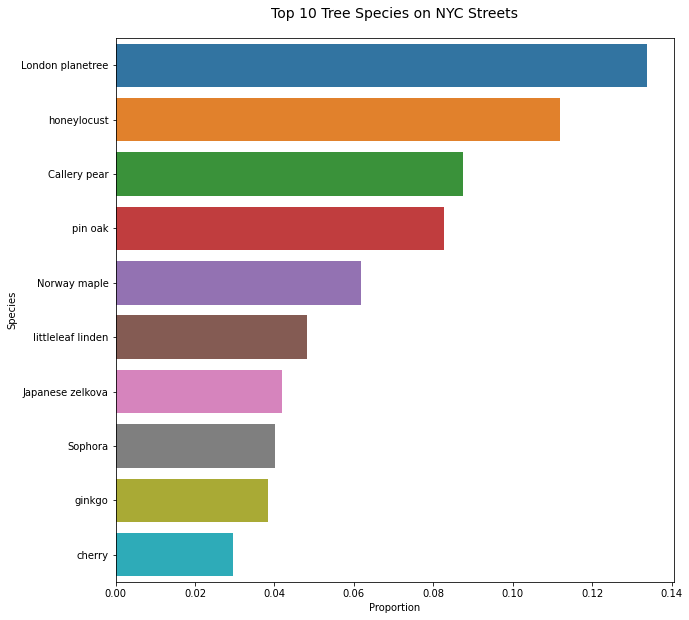

In [58]:
display_top = 10
plt.figure(figsize=(10,10))
ax=plt.subplot()
species_counts = df.spc_common.value_counts(dropna=True, normalize=True).reset_index()
species_counts.columns = ["species", "proportion"]
sns.barplot(data=species_counts[:display_top].sort_values(by='proportion', ascending=False), x='proportion', y='species', palette='tab10')
plt.title('Top {} Tree Species on NYC Streets'.format(display_top), fontsize=14, pad=20)
plt.ylabel('Species')
plt.xlabel('Proportion')
plt.show()


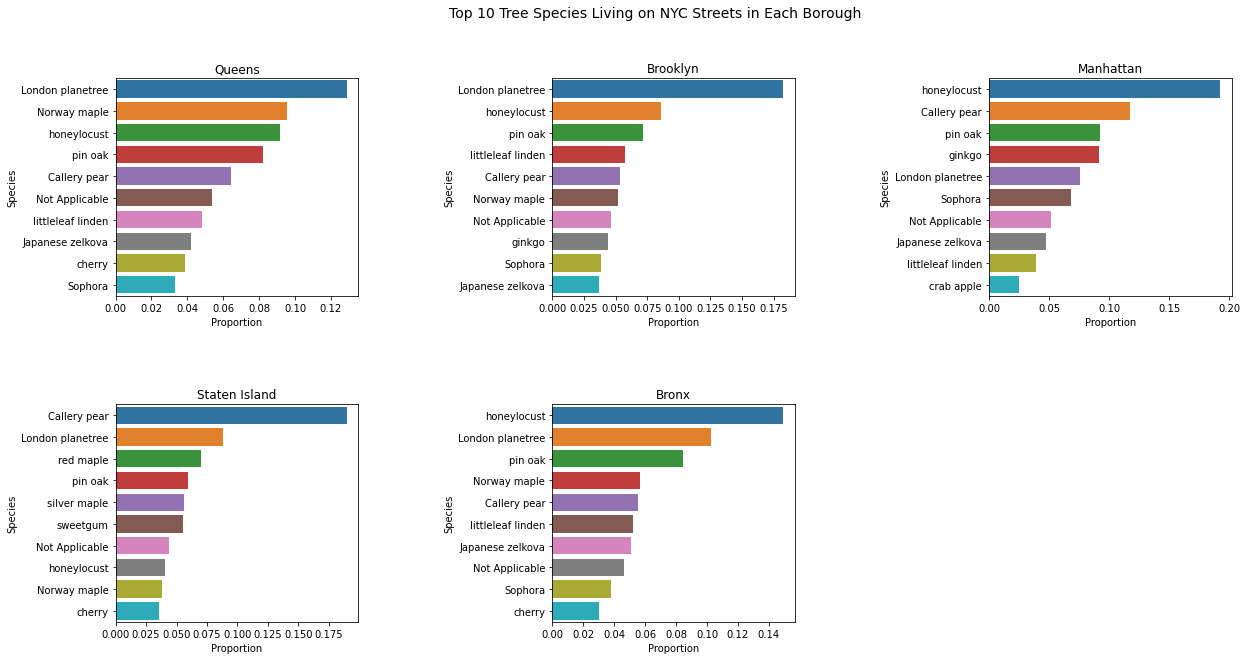

In [59]:
display_top = 10
plt.figure(figsize=(20,10))
plt.suptitle('Top {} Tree Species Living on NYC Streets in Each Borough'.format(display_top), fontsize=14)
for i, b in enumerate(df.borough.unique().tolist()):
    ax=plt.subplot(2, 3, i+1)
    sns.barplot(data=species_counts_boro[i][:display_top].sort_values(by='proportion', ascending=False), x='proportion', y='species', palette='tab10')
    plt.title(b)
    plt.ylabel('Species')
    plt.xlabel('Proportion')
    plt.subplots_adjust(hspace=0.5, wspace=0.8)
# plt.tight_layout()
plt.show()

In [63]:
top_species = species_counts[:10]
print("There are {} different species of tree living on NYC streets.".format(len(species_counts)))

print("\nThe top {} most common tree species represent {}% of the total NYC street trees population.\n{} species make up the remaining {}% of the tree population.\n".format(
   
    len(top_species),
    round(top_species.proportion.sum() * 100, 2),
    len(species_counts) - len(top_species),
    round(species_counts[len(top_species):].proportion.sum() * 100, 2)
))

# print overall statistics
print("Overall, the most common species of tree is the {}.\n{}% of all NYC street trees are {}.".format(
        species_counts.species[0],
        round(species_counts.proportion[0] * 100, 2),
        species_counts.species[0]
    ))
# print remaining top overall statistitcs
for i in range(1,10):
    print("{}% are {}".format(
        round(species_counts.proportion[i] * 100, 2),
        species_counts.species[i]
    ))

# print statistics for each borough
for e, b in enumerate(df.borough.unique().tolist()):
    # print top statistic for borough
    print("\nIn the borough of {}, the most common species of tree is the {}.\n{}% of all NYC street trees in {} are {}.".format(
        b,
        species_counts_boro[e].species[0],
        round(species_counts_boro[e].proportion[0] * 100, 2),
        b,
        species_counts_boro[e].species[0]
    ))
    # print remaining statistics for borough
    for i in range(1,10):
        print("{}% are {}".format(
            round(species_counts_boro[e].proportion[i] * 100, 2),
            species_counts_boro[e].species[i]
        ))

There are 124 different species of tree living on NYC streets.

The top 10 most common tree species represent 67.6% of the total NYC street trees population.
114 species make up the remaining 32.4% of the tree population.

Overall, the most common species of tree is the London planetree.
13.38% of all NYC street trees are London planetree.
11.18% are honeylocust
8.76% are Callery pear
8.26% are pin oak
6.19% are Norway maple
4.82% are littleleaf linden
4.2% are Japanese zelkova
4.01% are Sophora
3.84% are ginkgo
2.96% are cherry

In the borough of Queens, the most common species of tree is the London planetree.
12.88% of all NYC street trees in Queens are London planetree.
9.56% are Norway maple
9.19% are honeylocust
8.21% are pin oak
6.45% are Callery pear
5.36% are Not Applicable
4.79% are littleleaf linden
4.21% are Japanese zelkova
3.84% are cherry
3.32% are Sophora

In the borough of Brooklyn, the most common species of tree is the London planetree.
18.26% of all NYC street trees 

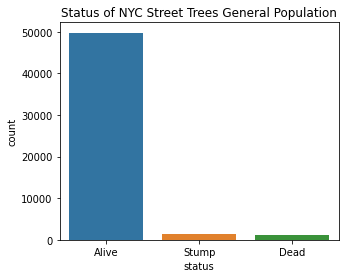

In [64]:
plt.figure(figsize=(5,4))
sns.countplot(data=tree_census_subset, x='status')
plt.title('Status of NYC Street Trees General Population')
plt.show()

In [93]:

# make a copy of the data where tree status is alive and drop na values
data_alive = df[df.status=='Alive'].dropna().copy()
# change the health variable type to categorical and order by value counts
data_alive['health'] = pd.Categorical(data_alive['health'], data_alive.health.value_counts().index.tolist())
data_alive.head()

tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status health  \
0   180683    348711  08/27/2015         3           0   OnCurb  Alive   Fair   
1   200540    315986  09/03/2015        21           0   OnCurb  Alive   Fair   
2   204026    218365  09/05/2015         3           0   OnCurb  Alive   Good   
3   204337    217969  09/05/2015        10           0   OnCurb  Alive   Good   
4   189565    223043  08/30/2015        21           0   OnCurb  Alive   Good   

                            spc_latin       spc_common steward guards  \
0                         Acer rubrum        red maple    None   None   
1                   Quercus palustris          pin oak    None   None   
2  Gleditsia triacanthos var. inermis      honeylocust    1or2   None   
3  Gleditsia triacanthos var. inermis      honeylocust    None   None   
4                     Tilia americana  American linden    None   None   

   sidewalk         user_type problems root_stone root_grate root_other  \
0  NoDamage  TreesCount Staff     None         No         No         No   
1    Damage  TreesCount Staff   Stones        Yes         No         No   
2    Damage         Volunteer     None         No         No         No   
3    Damage         Volunteer   Stones        Yes         No         No   
4    Damage         Volunteer   Stones        Yes         No         No   

  trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0         No         No         No         No        No         No   
1         No         No         No         No        No         No   
2         No         No         No         No        No         No   
3         No         No         No         No        No         No   
4         No         No         No         No        No         No   

             address  postcode      zip_city  community board  borocode  \
0  108-005 70 AVENUE     11375  Forest Hills              406         4   
1   147-074 7 AVENUE     11357    Whitestone              407         4   
2  390 MORGAN AVENUE     11211      Brooklyn              301         3   
3  1027 GRAND STREET     11211      Brooklyn              301         3   
4       603 6 STREET     11215      Brooklyn              306         3   

    borough  cncldist  st_assem  st_senate   nta            nta_name  boro_ct  \
0    Queens        29        28         16  QN17        Forest Hills  4073900   
1    Queens        19        27         11  QN49          Whitestone  4097300   
2  Brooklyn        34        50         18  BK90   East Williamsburg  3044900   
3  Brooklyn        34        53         18  BK90   East Williamsburg  3044900   
4  Brooklyn        39        44         21  BK37  Park Slope-Gowanus  3016500   

      state   latitude  longitude         x_sp         y_sp  council district  \
0  New York  40.723092 -73.844215  1027431.148  202756.7687              29.0   
1  New York  40.794111 -73.818679  1034455.701  228644.8374              19.0   
2  New York  40.717581 -73.936608  1001822.831  200716.8913              34.0   
3  New York  40.713537 -73.934456  1002420.358  199244.2531              34.0   
4  New York  40.666778 -73.975979   990913.775  182202.4260              39.0   

   census tract        bin           bbl  
0         739.0  4052307.0  4.022210e+09  
1         973.0  4101931.0  4.044750e+09  
2         449.0  3338310.0  3.028870e+09  
3         449.0  3338342.0  3.029250e+09  
4         165.0  3025654.0  3.010850e+09

Tree location on map!

In [94]:
# convert a pandas dataframe to a geo dataframe using geopandas
from shapely.geometry import Point, Polygon
def create_trees_geodf(variable_name, variable_value, data_frame):
    data = data_frame[data_frame[variable_name]  == variable_value]
    geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
    geo_data_frame = gpd.GeoDataFrame(data, geometry=geometry)
    return geo_data_frame

In [95]:
# function for plotting geolocation data on nyc borough boundaries map
def plot_geo_data(boundaries, geo_data_frame, boro_names, boro_colors, title, labels, label_variable, legend_title):
    fig = plt.figure(figsize=(15,15))
    ax = plt.subplot()
    shapes = boundaries.plot(ax=ax, alpha=0.3, edgecolor='black', cmap='tab10')
    
    for label, color in labels:
        data = geo_data_frame[geo_data_frame[label_variable]==label]
        marker_size = data.tree_dbh        
        data.plot(ax=ax, markersize=marker_size, alpha=0.3, color=color)
    
    # plt custom legend
    for label, color in labels:
        plt.scatter([], [], c=color, s=200,
                label=str(label))
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title=legend_title)                      
    plt.title(title, fontsize=14, pad=20)
    plt.axis("off")
    plt.show()


In [96]:
# Open shapefiles with NYC Borough boundaries

borough_boundaries = gpd.read_file('geo_export_87071461-9196-46f3-8d1b-52fed88fb835.dbf')
borough_boundaries

boro_code      boro_name    shape_area     shape_leng geometry
0        2.0          Bronx  1.186612e+09  462958.187332     None
1        5.0  Staten Island  1.623756e+09  325960.628294     None
2        3.0       Brooklyn  1.937593e+09  738745.840717     None
3        4.0         Queens  3.045878e+09  904188.424111     None
4        1.0      Manhattan  6.366027e+08  361212.476577     None

In [91]:
boro_names = borough_boundaries.boro_name.to_list()
boro_colors = ['red', 'green', 'orange', 'blue', 'pink']
dict(list(zip(boro_names, boro_colors)))

{'Bronx': 'red',
 'Staten Island': 'green',
 'Brooklyn': 'orange',
 'Queens': 'blue',
 'Manhattan': 'pink'}

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


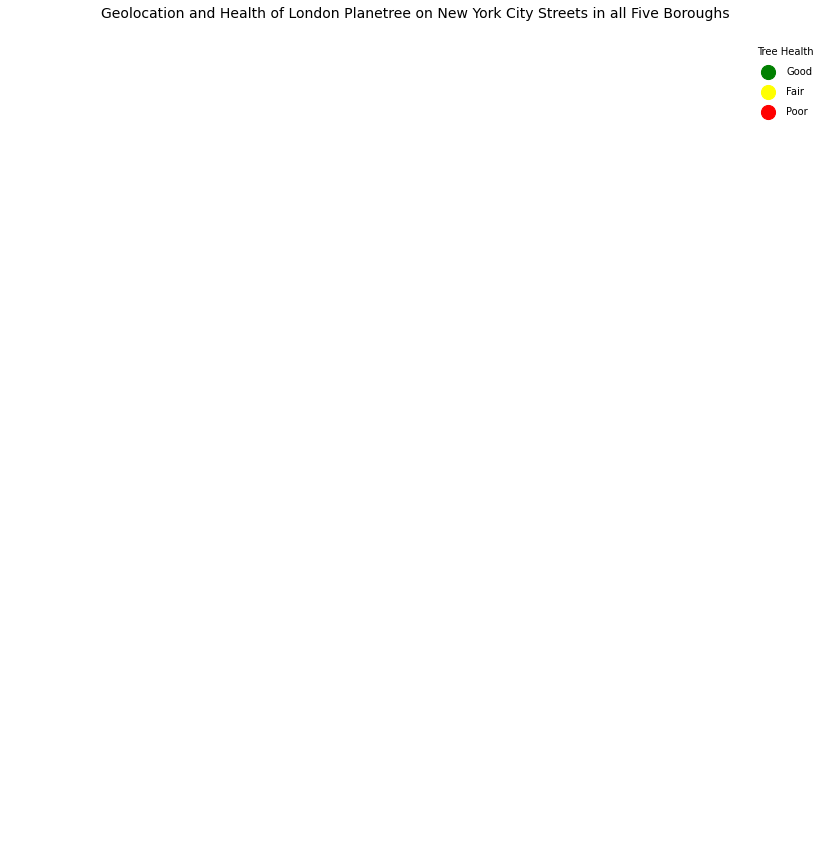

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


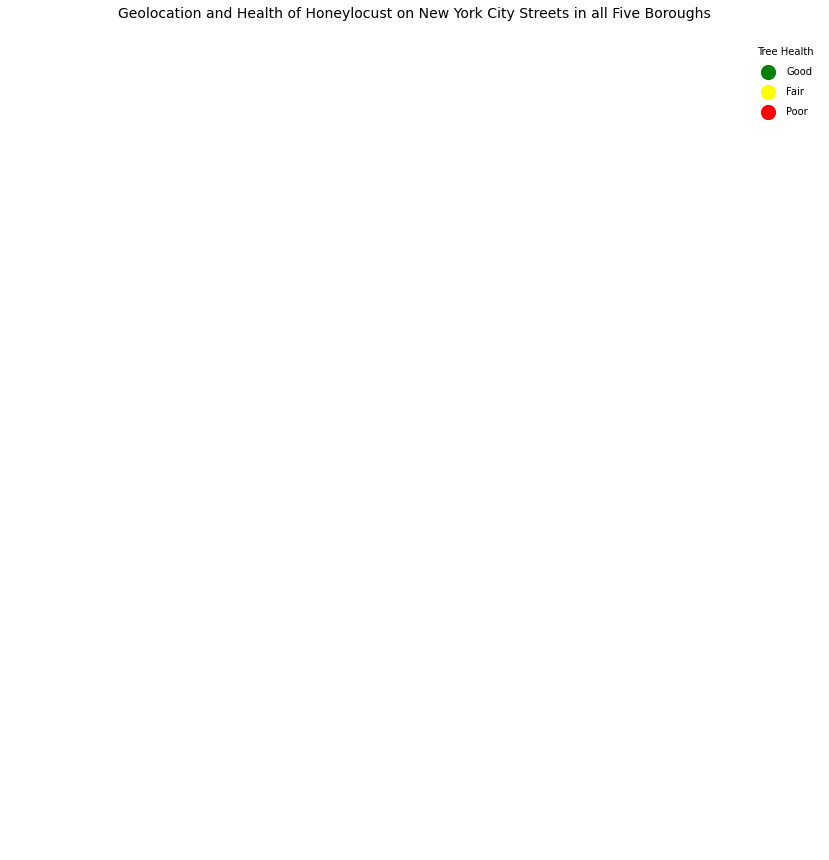

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


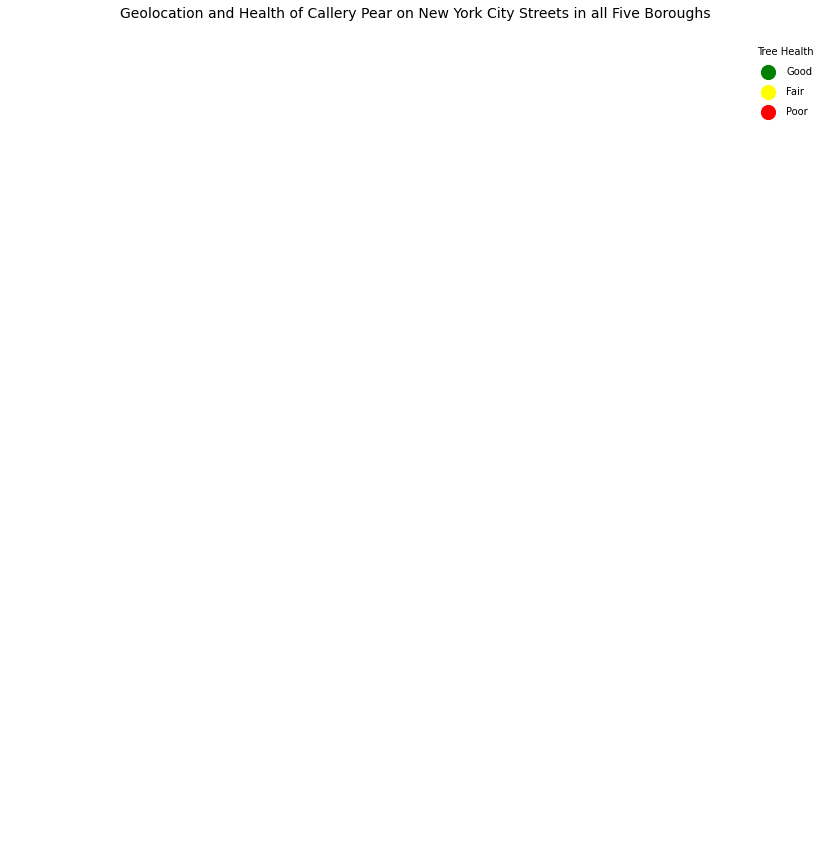

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


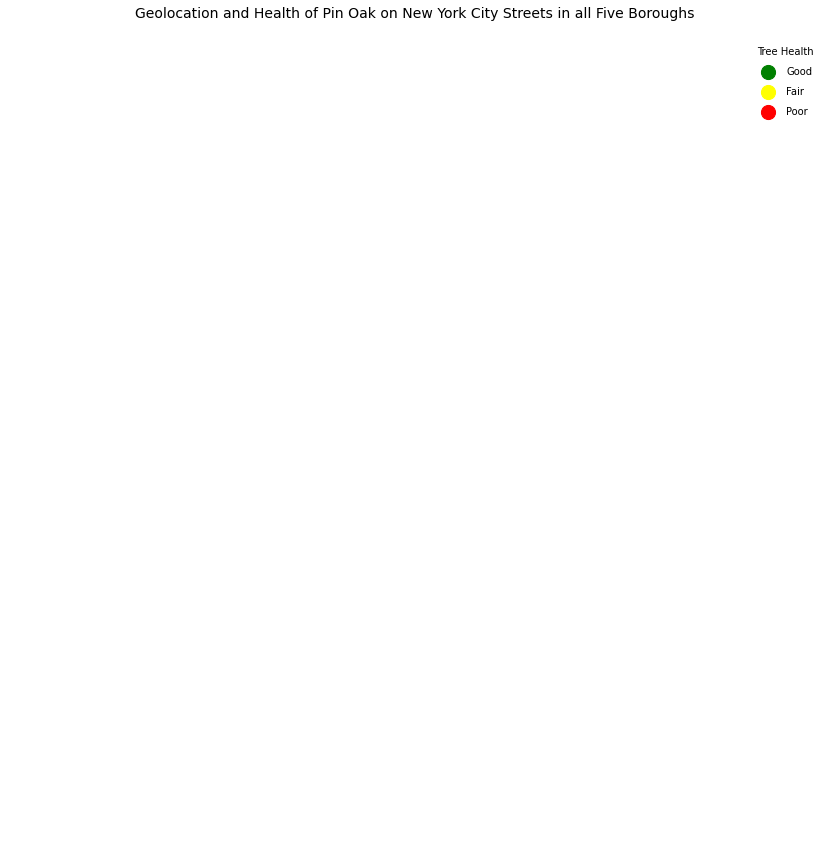

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


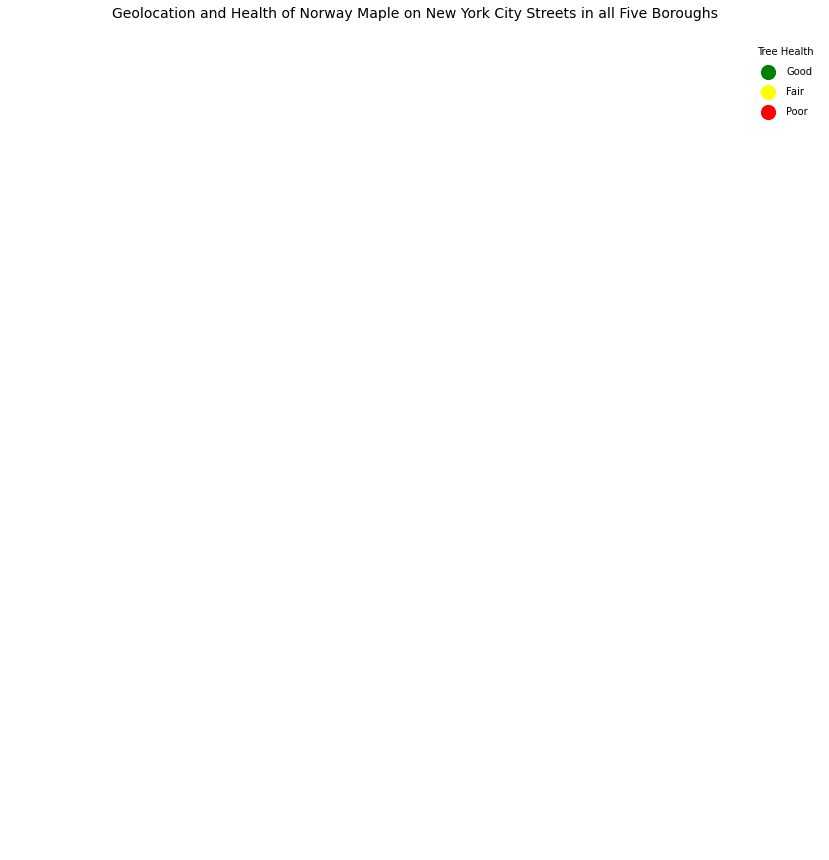

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


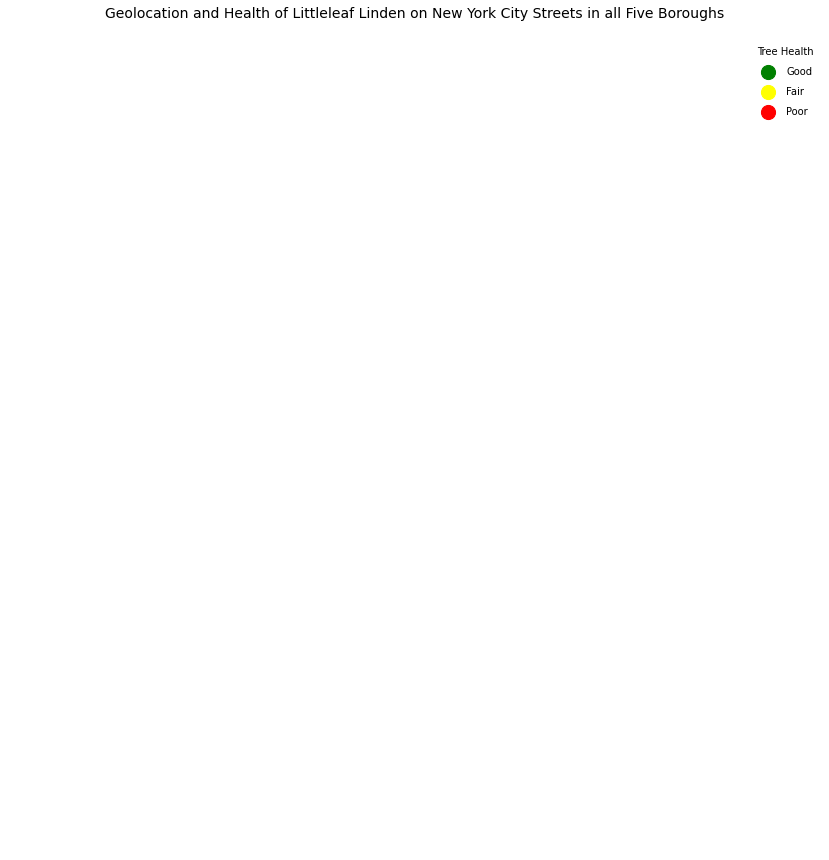

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


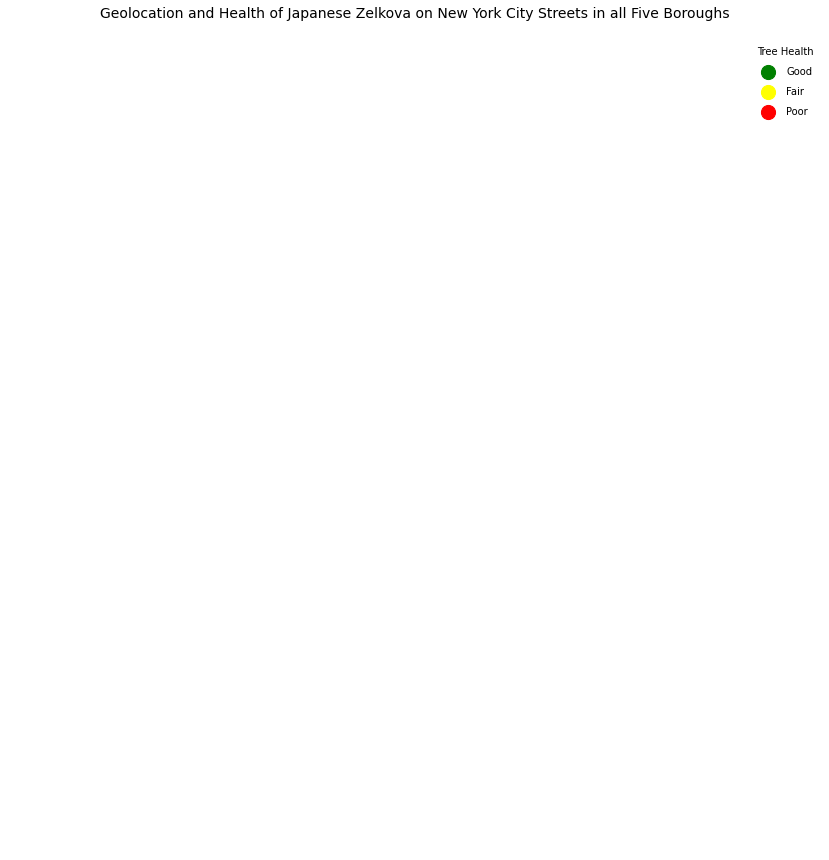

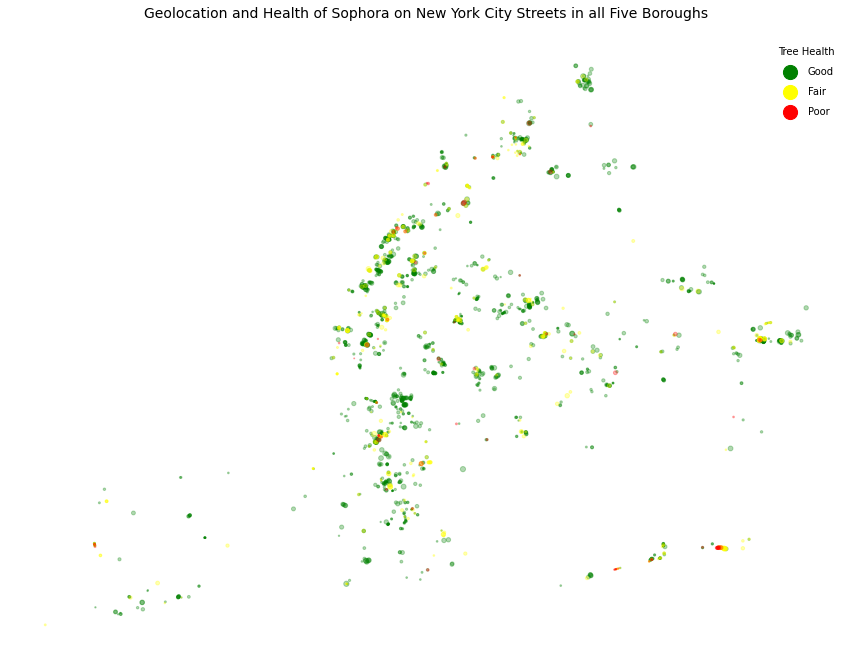

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


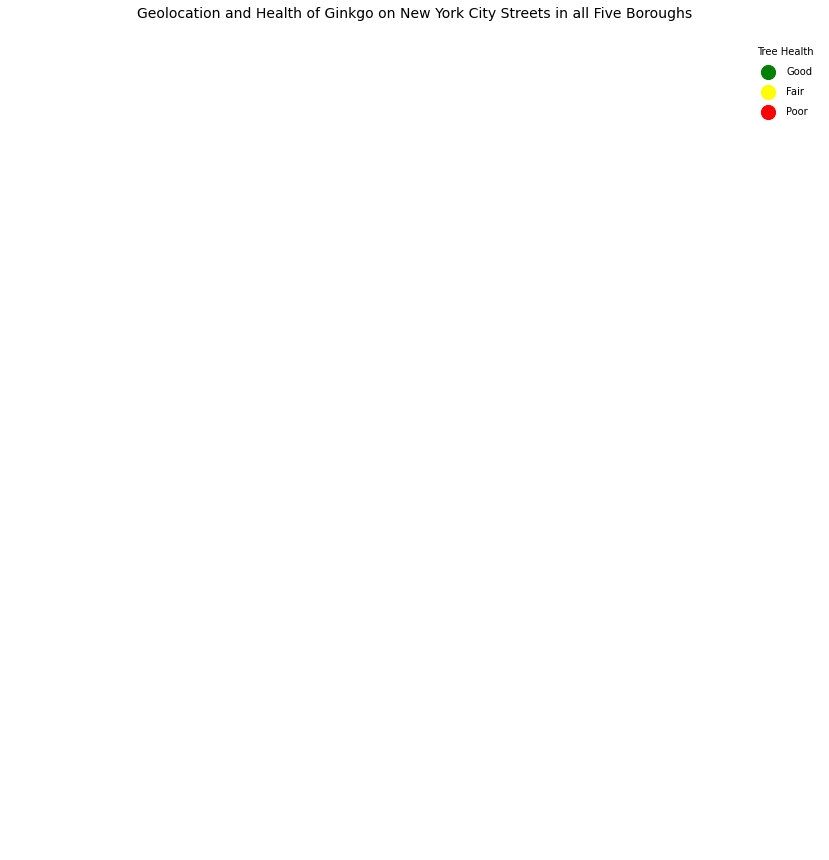

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


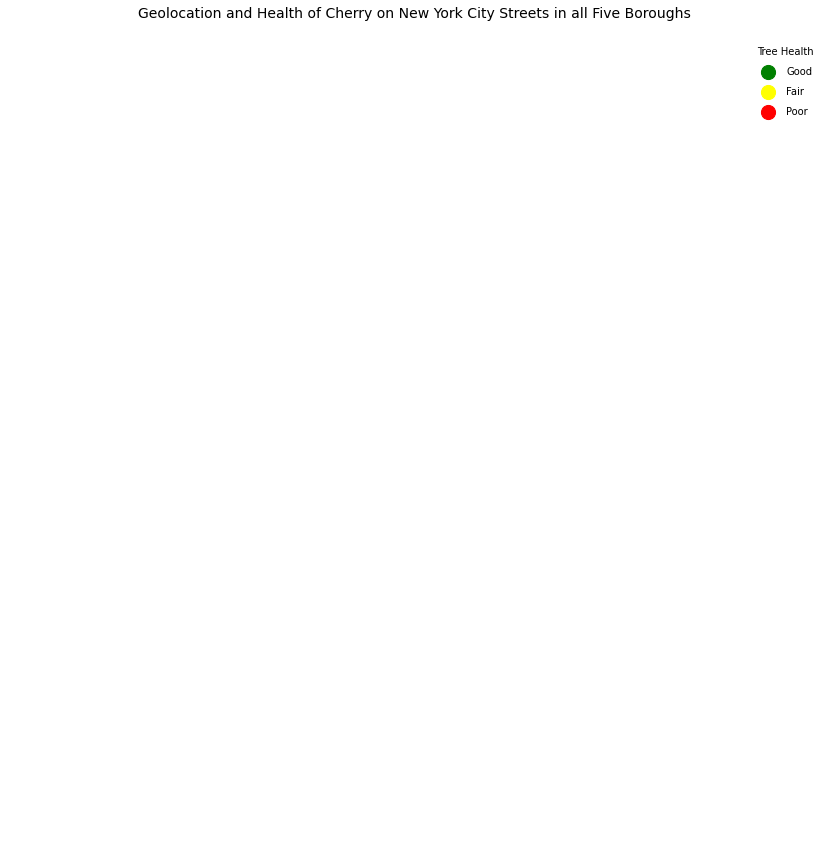

In [92]:
for species in top_species.species:
    plot_geo_data(
        boundaries=borough_boundaries,
        geo_data_frame=create_trees_geodf(
            variable_name='spc_common',
            variable_value=species.title(),
            data_frame=df[['spc_common', 'tree_dbh', 'health', 'longitude', 'latitude']]),
        boro_names=boro_names,
        boro_colors=boro_colors,
        title="Geolocation and Health of {} on New York City Streets in all Five Boroughs".format(species.title()),
        labels = [("Good", "green"), ("Fair", "yellow"), ("Poor", "red")],
        label_variable = 'health',
        legend_title = 'Tree Health'     
    )